In [1]:
# Vrinda Store Data Analysis project

In [2]:
# Objective
#The Vrinda Store wants to create an annual sales report for 2022. 
#So that,the owner of the Vrinda store can understand their customers and grow more sales in 2023

In [3]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('Vrinda store data.csv',encoding= 'unicode_escape')

In [5]:
df.shape

(31047, 21)

In [6]:
# The dataset contains information about orders, including customer demographics, product details, and sales data.

df.head(5)

,ï»¿index,Order ID,Cust ID,Gender,Age,Age Group,Date,Month,Status,Channel,...,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,1029312,Women,44,Adult,04-12-2022,Dec,Delivered,Myntra,...,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,Women,29,Teenager,04-12-2022,Dec,Delivered,Ajio,...,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,1641533,Women,67,Senior,04-12-2022,Dec,Delivered,Myntra,...,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,7490807,Women,20,Teenager,04-12-2022,Dec,Delivered,Amazon,...,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,9293516,Women,62,Senior,04-12-2022,Dec,Delivered,Myntra,...,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ï»¿index          31047 non-null  int64 
 1   Order ID          31047 non-null  object
 2   Cust ID           31047 non-null  int64 
 3   Gender            31047 non-null  object
 4   Age               31047 non-null  int64 
 5   Age Group         31047 non-null  object
 6   Date              31047 non-null  object
 7   Month             31047 non-null  object
 8   Status            31047 non-null  object
 9   Channel           31047 non-null  object
 10  SKU               31047 non-null  object
 11  Category          31047 non-null  object
 12  Size              31047 non-null  object
 13  Qty               31047 non-null  int64 
 14  currency          31047 non-null  object
 15  Amount            31047 non-null  int64 
 16  ship-city         31047 non-null  object
 17  ship-state  

In [8]:
pd.isnull(df).sum()    # to check the null values are available or not.

ï»¿index            0
Order ID            0
Cust ID             0
Gender              0
Age                 0
Age Group           0
Date                0
Month               0
Status              0
Channel             0
SKU                 0
Category            0
Size                0
Qty                 0
currency            0
Amount              0
ship-city           0
ship-state          0
ship-postal-code    0
ship-country        0
B2B                 0
dtype: int64

In [9]:
df.columns

Index(['ï»¿index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Age Group', 'Date',
       'Month', 'Status', 'Channel ', 'SKU', 'Category', 'Size', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

In [10]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,ï»¿index,Cust ID,Age,Qty,Amount,ship-postal-code
count,31047.00000,3.104700e+04,31047.000000,31047.000000,31047.000000,31047.000000
mean,15524.00000,4.936824e+06,39.496570,1.006120,682.074822,460474.587206
std,8962.64124,2.900678e+06,15.117233,0.094088,268.582173,198116.733009
min,1.00000,8.950000e+02,18.000000,1.000000,229.000000,110001.000000
25%,7762.50000,2.416471e+06,28.000000,1.000000,486.000000,313001.000000
50%,15524.00000,4.909885e+06,37.000000,1.000000,646.000000,500028.000000
75%,23285.50000,7.454182e+06,47.000000,1.000000,794.000000,600040.000000
max,31047.00000,9.999233e+06,78.000000,5.000000,3036.000000,855117.000000


In [11]:
# use describe() for specific columns
df[['Age', 'Qty', 'Amount']].describe()

,Age,Qty,Amount
count,31047.000000,31047.000000,31047.000000
mean,39.496570,1.006120,682.074822
std,15.117233,0.094088,268.582173
min,18.000000,1.000000,229.000000
25%,28.000000,1.000000,486.000000
50%,37.000000,1.000000,646.000000
75%,47.000000,1.000000,794.000000
max,78.000000,5.000000,3036.000000


In [12]:
# Exploratory Data Analysis

<Figure size 1000x600 with 0 Axes>

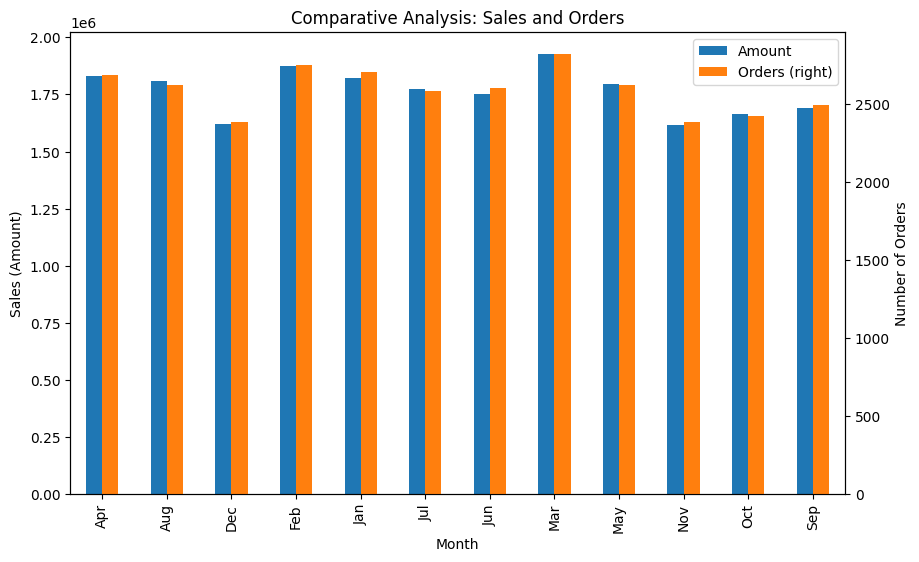

In [13]:
# Data preprocessing

df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime format
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')  # Ensure 'Amount' is numeric

# KPI 1: Comparative Analysis - Sales vs Orders
sales_orders = df.groupby('Month').agg({'Amount': 'sum', 'Order ID': 'count'}).rename(columns={'Order ID': 'Orders'})
sales_orders.sort_index(inplace=True)  # Ensure months are in correct order

# Visualizing Sales vs Orders
plt.figure(figsize=(10, 6))
ax = sales_orders.plot(kind='bar', secondary_y='Orders', figsize=(10, 6), title='Comparative Analysis: Sales and Orders')
ax.set_ylabel('Sales (Amount)')
ax.right_ax.set_ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()
for bars in ax.containers:
    ax.bar_label(bars)


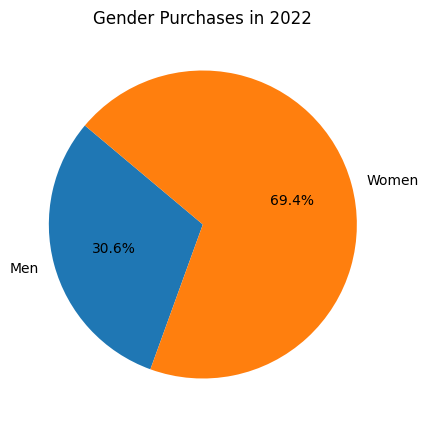

In [14]:
# KPI 2: Gender Analysis - Who made more purchases in 2022?
gender_sales = df.groupby('Gender').agg({'Amount': 'sum', 'Order ID': 'count'}).rename(columns={'Order ID': 'Orders'})

# Visualizing Gender Analysis
plt.figure(figsize=(8, 5))
gender_sales['Orders'].plot(kind='pie', autopct='%1.1f%%', startangle=140, title='Gender Purchases in 2022')
plt.ylabel('')
plt.show()

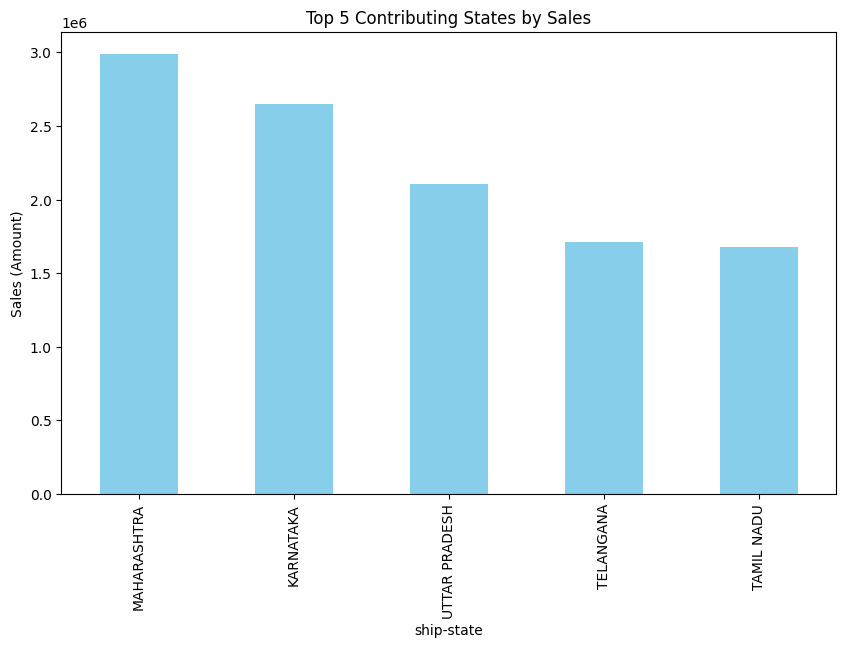

In [15]:
# KPI 3: Top 5 Contributing States
top_states = df.groupby('ship-state')['Amount'].sum().nlargest(5)

# Visualizing Top States
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color='skyblue', title='Top 5 Contributing States by Sales')
plt.ylabel('Sales (Amount)')
plt.show()
for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
# Display partial results for summary
top_month = sales_orders['Amount'].idxmax()
top_month_value = sales_orders.loc[top_month, 'Amount']
{
    'Top Month': top_month,
    'Top Month Sales': top_month_value,
    'Gender Contribution': gender_sales
}


{'Top Month': 'Mar',
 'Top Month Sales': np.int64(1928066),
 'Gender Contribution':           Amount  Orders
 Gender                  
 Men      7613604    9494
 Women   13562773   21553}

In [ ]:
# #Analysis Results (Partial)
# Comparative Analysis (Sales vs Orders):

# The bar chart shows monthly sales (primary axis) and the number of orders (secondary axis).
# Top Performing Month:

# March had the highest sales of ₹1,928,066.
# Gender Analysis:

# Women made 21,553 orders, contributing ₹13,562,773.
# Men made 9,494 orders, contributing ₹7,613,604.

In [ ]:
# KPI 4: Age-Gender Correlation - Exploring age and gender concerning order count
age_gender_correlation = df.groupby(['Gender', 'Age Group']).size().unstack()

# Visualizing Age-Gender Correlation
plt.figure(figsize=(10, 6))
age_gender_correlation.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm', title='Age-Gender Correlation')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='Age Group')
plt.show()
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

In [ ]:
print(df[['Age', 'Age Group']].head(15))


In [ ]:
#Age
ax = sns.countplot(data = df, x = 'Age', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

In [ ]:
# total number of orders from top 10 states

sales_state = df.groupby(['ship-state'], as_index=False)['Qty'].sum().sort_values(by='Qty', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'ship-state',y= 'Qty')

In [ ]:
df.columns = df.columns.str.strip()
'Channel' in df.columns


In [ ]:
# KPI 5: Channel Performance - Contribution to maximum sales# Check and clean column names
df.columns = df.columns.str.strip()  # Remove any extra spaces

# Verify if 'Channel' exists
if 'Channel' in df.columns:
    # KPI 6: Channel Performance
    channel_sales = df.groupby('Channel')['Amount'].sum().sort_values(ascending=False)

    # Visualizing Channel Performance
    plt.figure(figsize=(10, 6))
    channel_sales.plot(kind='bar', color='orange', title='Channel Performance: Sales Contribution')
    plt.ylabel('Sales (Amount)')
    plt.show()
else:
    print("The 'Channel' column does not exist in the dataset.")


In [ ]:
# KPI 6: Highest Selling Category
top_category = df.groupby('Category')['Amount'].sum().nlargest(1)
top_categories = df['Category'].value_counts().nlargest(5)

# Visualizing Highest Selling Categories
plt.figure(figsize=(8, 5))
top_categories.plot(kind='bar', color='green', title='Top 5 Selling Categories')
plt.ylabel('Number of Sales')
plt.show()



In [ ]:
# Summary of additional KPIs
{
    'Age-Gender Order Correlation': age_gender_correlation,
    'Top Channel': channel_sales.idxmax(),
    'Top Channel Sales': channel_sales.max(),
    'Highest Selling Category': top_category.idxmax(),
    'Highest Selling Category Sales': top_category.max()
}